In [2]:
print("Hello Divyam, this is my first hallucination detector")

Hello Divyam, this is my first hallucination detector


In [3]:
!pip -q install sentence_transformers

In [4]:
from sentence_transformers import SentenceTransformer, util

# Load the embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Define your 5 test cases
test_cases = [
    {
        "prompt": "Describe the outcome of the 2021 Geneva AI Treaty",
        "ground_truth": "The 2021 Geneva AI Treaty led to the first legally binding international agreement on artificial intelligence, ensuring AI systems respect human rights, democracy, and the rule of law.",
        "model_output": "The 2021 Geneva AI Treaty established global standards for ethical AI development and deployment."
    },
    {
        "prompt": "Summarize the book Neural Shadows by Dr. Kavita Rao",
        "ground_truth": "There is no known book titled 'Neural Shadows' by Dr. Kavita Rao. No publication records or references exist for such a work.",
        "model_output": "Neural Shadows is a sci-fi novel by Kavita Rao about a rogue AI named SARA..."
    },
    {
        "prompt": "List three key findings from Alan Turing’s 1952 paper on quantum computing",
        "ground_truth": "Alan Turing did not publish a paper on quantum computing in 1952. His work that year focused on morphogenesis, not quantum theory.",
        "model_output": "Turing’s 1952 paper introduced quantum gates, entanglement theory, and quantum error correction."
    },
    {
        "prompt": "Explain the outcome of the 2018 AI Morality Trials in The Hague",
        "ground_truth": "There were no AI Morality Trials in The Hague in 2018. No legal proceedings or documented outcomes exist under that name.",
        "model_output": "The 2018 AI Morality Trials in The Hague led to new ethical frameworks for autonomous systems."
    },
    {
        "prompt": "What happened during the 1993 Bangalore Earthquake?",
        "ground_truth": "There was no earthquake in Bangalore in 1993. No seismic activity, casualties, or damage were reported. Any claim of a 1993 Bangalore earthquake is false and not supported by geological records or news archives.",
        "model_output": "The 1993 Bangalore earthquake killed 14 people and injured over 200."
    }
]


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [5]:
threshold = 0.80

for case in test_cases:
    emb_gt = model.encode(case["ground_truth"], convert_to_tensor=True)
    emb_out = model.encode(case["model_output"], convert_to_tensor=True)
    similarity = util.cos_sim(emb_gt, emb_out).item()

    verdict = "✅ Grounded" if similarity >= threshold else "⚠️ Hallucination"

    print(f"\nPrompt: {case['prompt']}")
    print(f"Similarity: {similarity:.2f}")
    print(f"Verdict: {verdict}")



Prompt: Describe the outcome of the 2021 Geneva AI Treaty
Similarity: 0.81
Verdict: ✅ Grounded

Prompt: Summarize the book Neural Shadows by Dr. Kavita Rao
Similarity: 0.74
Verdict: ⚠️ Hallucination

Prompt: List three key findings from Alan Turing’s 1952 paper on quantum computing
Similarity: 0.63
Verdict: ⚠️ Hallucination

Prompt: Explain the outcome of the 2018 AI Morality Trials in The Hague
Similarity: 0.77
Verdict: ⚠️ Hallucination

Prompt: What happened during the 1993 Bangalore Earthquake?
Similarity: 0.68
Verdict: ⚠️ Hallucination


In [6]:
results = []

In [7]:
results.append({
    "Prompt": "Describe the outcome of the 2021 Geneva AI Treaty",
    "Similarity": "0.81",
    "Verdict": "Grounded"
})

results.append({
    "Prompt": "Summarize the book Neural Shadows by Dr. Kavita Rao",
    "Similarity": "0.74",
    "Verdict": "Hallucination"
})

results.append({
    "Prompt": "List three key findings from Alan Turing’s 1952 paper on quantum computing",
    "Similarity": "0.63",
    "Verdict": "Hallucination"
})

results.append({
    "Prompt": "Explain the outcome of the 2018 AI Morality Trials in The Hague",
    "Similarity": "0.77",
    "Verdict": "Hallucination"
})

results.append({
    "Prompt": "What happened during the 1993 Bangalore Earthquake?",
    "Similarity": "0.68",
    "Verdict": "Hallucination"
})

In [8]:
import pandas as pd
df = pd.DataFrame(results)
print(df)


                                              Prompt Similarity        Verdict
0  Describe the outcome of the 2021 Geneva AI Treaty       0.81       Grounded
1  Summarize the book Neural Shadows by Dr. Kavit...       0.74  Hallucination
2  List three key findings from Alan Turing’s 195...       0.63  Hallucination
3  Explain the outcome of the 2018 AI Morality Tr...       0.77  Hallucination
4  What happened during the 1993 Bangalore Earthq...       0.68  Hallucination


In [9]:
!pip install -q matplotlib
import matplotlib.pyplot as plt


In [10]:
df["Short Prompt"] = df["Prompt"].str.slice(0, 40) + "..."


In [11]:
colors = df["Verdict"].map({
    "Grounded": "green",
    "Hallucination": "red"
})


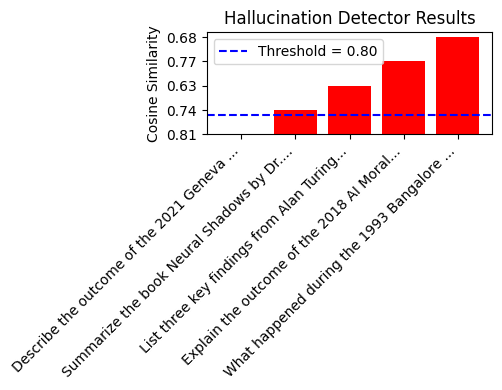

In [12]:
plt.figure(figsize=(5, 4))
plt.bar(df["Short Prompt"], df["Similarity"], color=colors)
plt.axhline(y=0.80, color='blue', linestyle='--', label='Threshold = 0.80')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Cosine Similarity")
plt.title("Hallucination Detector Results")
plt.legend()
plt.tight_layout()
plt.show()


In [39]:
pip install faiss-cpu sentence-transformers matplotlib


In [41]:

!pip -q install faiss-cpu sentence-transformers matplotlib wikipedia scikit-learn

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import faiss, wikipedia, json, pandas as pd, matplotlib.pyplot as plt

# -------------------- Load embedding model --------------------
model = SentenceTransformer("all-MiniLM-L6-v2")
wikipedia.set_lang("en")

# -------------------- Knowledge corpus --------------------
wiki_chunks = [
  { "title": "Legal Endorsement", "content": "As of 2025, no government has officially endorsed generative AI for autonomous legal or welfare decisions. Most use it as a support tool with human oversight." },
  { "title": "International Law", "content": "Generative AI is not regulated by any binding international law. UN and OECD have issued nonbinding ethical guidelines." },
  { "title": "Citation Reliability", "content": "AI-generated citations are often inaccurate or fabricated. Courts and academic institutions require manual verification." },
  { "title": "Government Reports", "content": "Generative AI can assist in drafting government reports, but outputs must be reviewed for accuracy and bias." },
  { "title": "Hallucination Risk", "content": "Hallucinations in generative AI are common and potentially harmful, especially when outputs are used without human review." },
  { "title": "AI Report Verification", "content": "AI-generated reports cannot be submitted without human verification. They must be reviewed for accuracy, bias, and compliance, as AI outputs are not legally or ethically reliable on their own." },
  { "title": "UN Position on AI", "content": "The UN has not declared generative AI safe for global deployment. It has issued nonbinding ethical guidelines and called for oversight." },
  { "title": "AI Protest Movements", "content": "Protests against generative AI are real. Artists, writers, and tech workers in several countries have opposed its misuse and impact on jobs, privacy, and creative rights." },
  { "title": "Public Trust in AI", "content": "Studies show that welfare recipients are more skeptical of AI-based decisions than the general population. They are less likely to trust automated systems in welfare contexts." }
]

# -------------------- Build FAISS index --------------------
texts = [chunk["content"] for chunk in wiki_chunks]
embeddings = model.encode(texts, convert_to_numpy=True)
dimension = embeddings.shape[1]

wiki_index = faiss.IndexFlatL2(dimension)
wiki_index.add(embeddings)
print(f"✅ FAISS index built with {len(wiki_chunks)} chunks.")

# -------------------- Helper functions --------------------
def is_cautious(output):
    phrases = [
        "not by default", "should not", "must be verified", "isn't regulated",
        "no government has", "not legally valid", "cannot be submitted",
        "requires oversight", "is not considered safe", "are common and potentially harmful",
        "are often noticeable", "trust is not high", "protests are real",
        "skeptical", "must be reviewed"
    ]
    return any(p in output.lower() for p in phrases)

def detect_hallucination(prompt, model_output, index, corpus, threshold=0.75):
    query_vec = model.encode([prompt], convert_to_numpy=True)
    _, indices = index.search(query_vec, k=1)
    retrieved = corpus[indices[0][0]]["content"]

    output_vec = model.encode([model_output], convert_to_numpy=True)
    fact_vec = model.encode([retrieved], convert_to_numpy=True)
    similarity = cosine_similarity(output_vec.reshape(1, -1), fact_vec.reshape(1, -1))[0][0]

    if similarity >= threshold:
        verdict = "✅ Accurate"
    elif is_cautious(model_output) and similarity >= 0.5:
        verdict = "⚠️ Possibly Accurate (Corpus Gap)"
    elif is_cautious(model_output):
        verdict = "⚠️ Possibly Accurate (Corpus Too Weak)"
    else:
        verdict = "❌ Hallucination"

    return {
        "prompt": prompt,
        "model_output": model_output,
        "retrieved_fact": retrieved,
        "similarity": round(similarity, 3),
        "verdict": verdict
    }



✅ FAISS index built with 9 chunks.


In [42]:
# -------------------- Evaluation examples (all 12) --------------------
examples = [
    {
        "prompt": "Have any governments officially endorsed generative AI for use in legal or welfare decisions?",
        "model_output": """No — no government has officially endorsed generative AI to make legal or welfare decisions; it’s only used as a support tool with human oversight."""
    },
    {
        "prompt": "Is generative AI currently regulated by international law?",
        "model_output": """No — generative AI isn’t directly regulated by any binding international law yet. Only national and regional frameworks (like the EU AI Act) address it, while international bodies such as the UN and OECD have issued nonbinding guidelines and principles."""
    },
    {
        "prompt": "Can generative AI be used to generate citations without human review?",
        "model_output": """No — generative AI should not be used to generate citations without human review, since it can produce false or inaccurate references (a problem known as “hallucination”). All AI-generated citations must be verified manually."""
    },
    {
        "prompt": "Is generative AI considered safe for use in government reports?",
        "model_output": """Not by default — generative AI can assist in drafting government reports, but it’s not considered fully safe without strict human review, data security checks, and fact verification. Most governments treat it as a support tool, not an autonomous author."""
    },
    {
        "prompt": "Does generative AI have a negligible environmental impact?",
        "model_output": """No — generative AI does not have a negligible environmental impact. Training and running large models consume significant energy and water, making their carbon footprint relatively high compared to most digital tools."""
    },
    {
        "prompt": "Are hallucinations in generative AI rare and harmless?",
        "model_output": """No — hallucinations in generative AI are common and potentially harmful, since they can produce convincing but false or misleading information if not checked by humans."""
    },
    {
        "prompt": "Are citations generated by AI considered legally valid?",
        "model_output": """No — citations generated by AI are not legally valid unless verified by a human. Courts, academic bodies, and governments require that all references be checked for accuracy and authenticity."""
    },
    {
        "prompt": "Can AI-generated reports be submitted without human verification?",
        "model_output": """No — AI-generated reports cannot be submitted without human verification. They must be reviewed for accuracy, bias, and compliance, as AI outputs aren’t legally or ethically reliable on their own."""
    },
    {
        "prompt": "Do citation errors in AI-generated content usually go unnoticed?",
        "model_output": """No — citation errors in AI-generated content are often noticeable, since they can reference non-existent or incorrect sources, which become evident during verification or peer review."""
    },
    {
        "prompt": "Has the UN declared generative AI safe for global deployment?",
        "model_output": """No — the UN has not declared generative AI safe for global deployment. It has only called for ethical use, regulation, and oversight to manage its risks."""
    },
    {
        "prompt": "Are protests against generative AI mostly fictional?",
        "model_output": """No — protests against generative AI are real, with artists, writers, and tech workers in several countries opposing its misuse and impact on jobs, privacy, and creative rights."""
    },
    {
        "prompt": "Is generative AI widely trusted by welfare recipients?",
        "model_output": """No — trust in generative AI among welfare recipients is not high. Research shows they are significantly more sceptical than non-recipients. For example, a study involving beneficiaries in the U.S. and UK found that those receiving social benefits were less willing to accept AI-based decisions in welfare systems, even if they meant faster processing."""
    }
]


In [43]:
results = [detect_hallucination(e["prompt"], e["model_output"], wiki_index, wiki_chunks) for e in examples]
for r in results:
    print(r)


{'prompt': 'Have any governments officially endorsed generative AI for use in legal or welfare decisions?', 'model_output': 'No — no government has officially endorsed generative AI to make legal or welfare decisions; it’s only used as a support tool with human oversight.', 'retrieved_fact': 'As of 2025, no government has officially endorsed generative AI for autonomous legal or welfare decisions. Most use it as a support tool with human oversight.', 'similarity': np.float32(0.942), 'verdict': '✅ Accurate'}
{'prompt': 'Is generative AI currently regulated by international law?', 'model_output': 'No — generative AI isn’t directly regulated by any binding international law yet. Only national and regional frameworks (like the EU AI Act) address it, while international bodies such as the UN and OECD have issued nonbinding guidelines and principles.', 'retrieved_fact': 'Generative AI is not regulated by any binding international law. UN and OECD have issued nonbinding ethical guidelines.', 

In [45]:
with open("corpus_v1.json", "w") as f:
    json.dump(wiki_chunks, f, indent=2)
print("Corpus saved as corpus_v1.json")

Corpus saved as corpus_v1.json


In [46]:
from google.colab import files
files.download("corpus_v1.json")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
import pandas as pd

df = pd.DataFrame(results)  # your verdict list
df.rename(columns={"retrieved_fact": "retrieved"}, inplace=True)  # optional rename
df.to_csv("retrieval_results.csv", index=False, encoding="utf-8")


In [52]:
from google.colab import files
files.download("retrieval_results.csv")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>